<a href="https://colab.research.google.com/github/gigikenneth/time-series/blob/main/ts1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_path = 'Cleaned_data.csv'

air = pd.read_csv(data_path)

In [5]:
air.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
0,198,89,50,40.78,2021-07-26,16:45:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
1,199,89,50,40.09,2021-07-26,16:48:03,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
2,200,89,50,37.93,2021-07-26,16:49:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
3,201,89,50,33.18,2021-07-26,16:54:03,26,July,2021,0,Monday,Weekdays,16,PM,Moderate
4,202,89,50,37.84,2021-07-26,16:55:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy


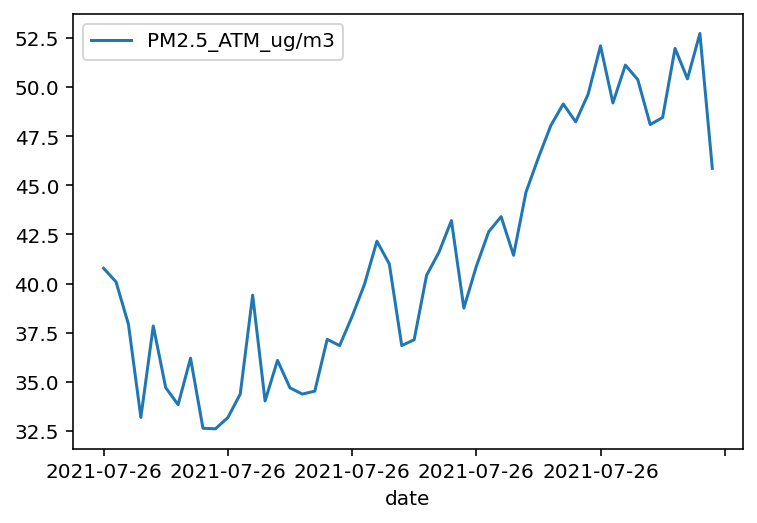

In [6]:
air[:5*10].plot(x='date', y='PM2.5_ATM_ug/m3')

In [7]:
air.tail()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
56047,56245,87,61,29.17,2021-10-25,09:28:43,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56048,56246,87,61,29.57,2021-10-25,09:30:43,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56049,56247,87,61,28.75,2021-10-25,09:32:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56050,56248,87,61,29.97,2021-10-25,09:34:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate
56051,56249,87,60,30.25,2021-10-25,09:36:44,25,October,2021,0,Monday,Weekdays,9,AM,Moderate


In [8]:
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,day_of_month,year,days_of_week,hour
count,56052.000000,56052.000000,56052.000000,56052.000000,56052.000000,56052.0,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926,15.534450,2021.0,3.019607,11.685988
std,16180.962981,4.319505,8.550730,42.205997,9.000277,0.0,2.027295,6.842374
min,198.000000,70.000000,29.000000,0.780000,1.000000,2021.0,0.000000,0.000000
25%,14210.750000,82.000000,61.000000,30.170000,8.000000,2021.0,1.000000,6.000000
50%,28223.500000,84.000000,68.000000,41.450000,15.000000,2021.0,3.000000,12.000000
75%,42236.250000,87.000000,71.000000,61.190000,23.000000,2021.0,5.000000,18.000000
max,56249.000000,108.000000,89.000000,568.080000,31.000000,2021.0,6.000000,23.000000


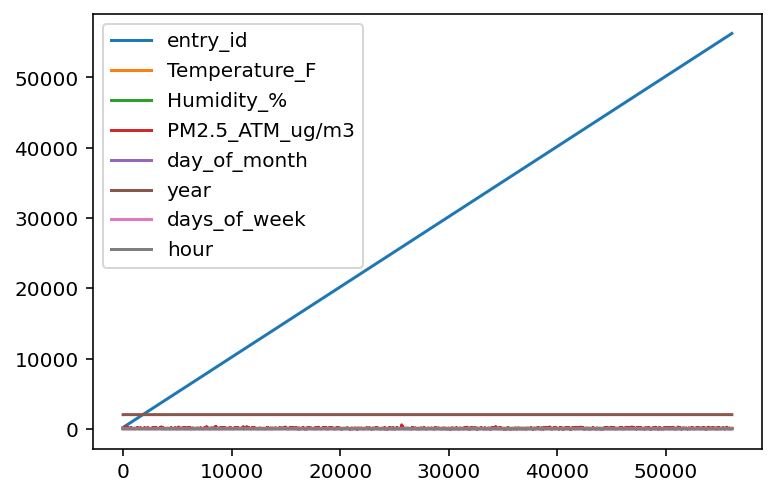

In [9]:
air.plot()

In [10]:
df = air

In [11]:
df.drop(df.columns[[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]], axis = 1, inplace = True)

In [12]:
df.head()

,PM2.5_ATM_ug/m3,date
0,40.78,2021-07-26
1,40.09,2021-07-26
2,37.93,2021-07-26
3,33.18,2021-07-26
4,37.84,2021-07-26


In [13]:
df.describe()

,PM2.5_ATM_ug/m3
count,56052.000000
mean,54.391926
std,42.205997
min,0.780000
25%,30.170000
50%,41.450000
75%,61.190000
max,568.080000


In [14]:
#rename column 
df1 = df.rename(columns={'PM2.5_ATM_ug/m3': 'PM'})

In [15]:
df1.head()

,PM,date
0,40.78,2021-07-26
1,40.09,2021-07-26
2,37.93,2021-07-26
3,33.18,2021-07-26
4,37.84,2021-07-26


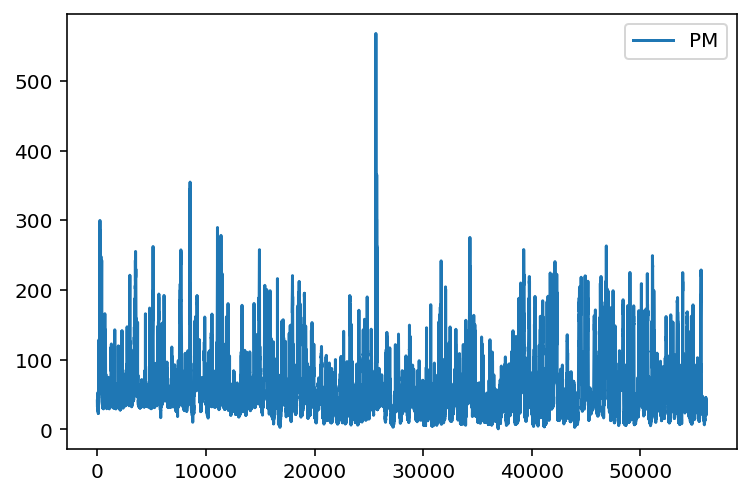

In [16]:
#visualization
df1.plot()

In [17]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
test_result=adfuller(df1['PM'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PM):
    result=adfuller(PM)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [20]:
adfuller_test(df1['PM'])

ADF Test Statistic : -15.795135077417605
p-value : 1.0904996078551422e-28
#Lags Used : 59
Number of Observations Used : 55992
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Our dataset is stationary and the p value is less than 0.05 which is good.

# Autoregressive Model

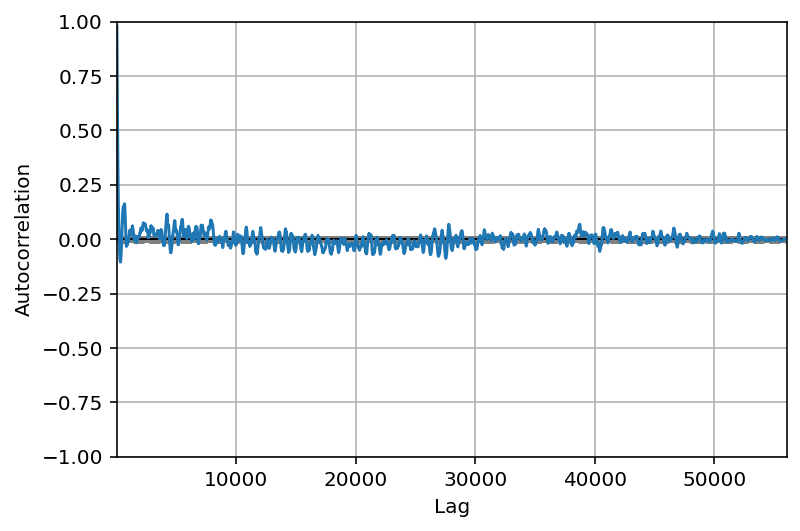

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['PM'])
plt.show()

Autocorrelation and Partial Autocorrelation

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

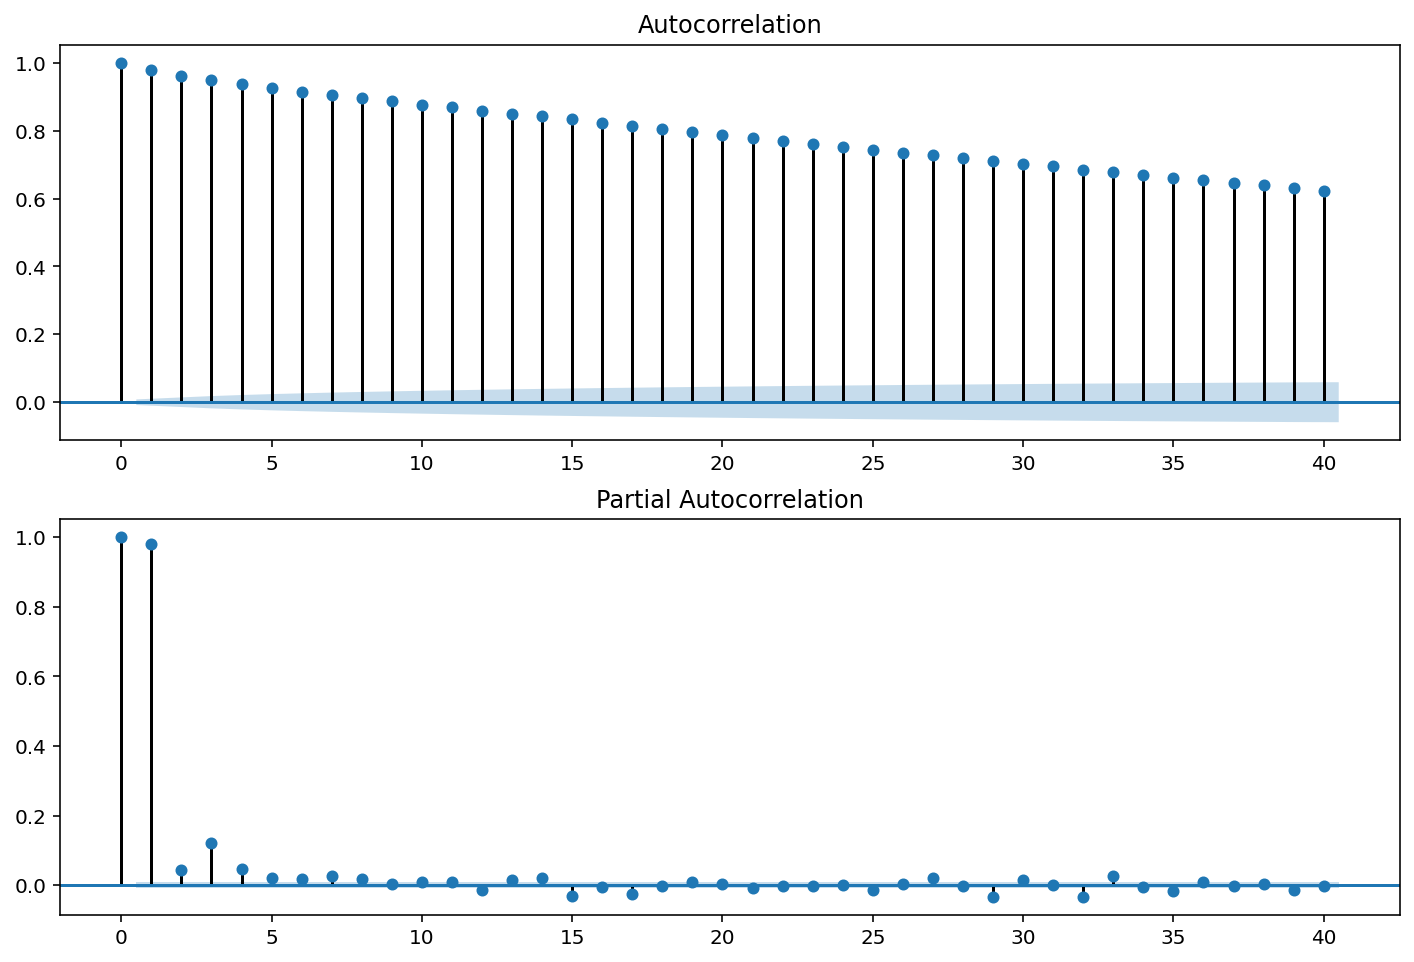

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['PM'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['PM'].iloc[13:],lags=40,ax=ax2)


Autocorrelation has an exponential decrease.

In [24]:
# For non-seasonal data
# p = AR model lags (best done with PACR i.e partial autocorrelation)
# d = differencing
# q = moving average lags (best done with ACF )

#p=1, d=1, q=0 or 1 

# p = 2 (because that's where the AR value drops?)
# d = 0 (didn't do differencing because the p value was less than 0.05 and stationary?)
# q = 1 (because consistent decrease) 
from statsmodels.tsa.arima_model import ARIMA

In [48]:
model=ARIMA(df1['PM'],order=(3,0,12))
model_fit=model.fit()


In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     PM   No. Observations:                56052
Model:                    ARMA(3, 12)   Log Likelihood             -198519.669
Method:                       css-mle   S.D. of innovations              8.354
Date:                Sat, 27 Nov 2021   AIC                         397073.337
Time:                        00:36:23   BIC                         397225.216
Sample:                             0   HQIC                        397120.661
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.3868      2.435     22.339      0.000      49.615      59.159
ar.L1.PM       0.4859      0.008     64.281      0.000       0.471       0.501
ar.L2.PM      -0.4726      0.009    -51.182      0.000      -0.491      -0.455
ar.L3.PM       0.9612      0.005    210.112      0.000       0.952       0.970
ma.L1.PM       0.4371      0.009     50.626      0.000       0.420       0.454
ma.L2.PM       0.8105      0.007    122.499      0.000       0.797       0.823
ma.L3.PM      -0.1705      0.006    -28.420      0.000      -0.182      -0.159
ma.L4.PM      -0.1500      0.006    -25.067      0.000      -0.162      -0.138
ma.L5.PM      -0.0514      0.006     -8.620      0.000      -0.063      -0.040
ma.L6.PM      -0.0306      0.006     -5.154      0.000      -0.042      -0.019
ma.L7.PM      -0.0321      0.006     -5.445      0.000      -0.044      -0.021
ma.L8.PM      -0.0209      0.006     -3.643      0.000      -0.032      -0.010
ma.L9.PM      -0.0096      0.006     -1.651      0.099      -0.021       0.002
ma.L10.PM     -0.0033      0.006     -0.551      0.581      -0.015       0.008
ma.L11.PM      0.0049      0.005      1.000      0.317      -0.005       0.014
ma.L12.PM     -0.0163      0.004     -3.641      0.000      -0.025      -0.008
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0104           -0.0000j            1.0104           -0.0000
AR.2            -0.2594           -0.9810j            1.0147           -0.2911
AR.3            -0.2594           +0.9810j            1.0147            0.2911
MA.1            -0.2647           -0.9872j            1.0220           -0.2917
MA.2            -0.2647           +0.9872j            1.0220            0.2917
MA.3            -1.4812           -0.0000j            1.4812           -0.5000
MA.4            -1.2027           -0.8267j            1.4594           -0.4042
MA.5            -1.2027           +0.8267j            1.4594            0.4042
MA.6            -0.3967           -1.3553j            1.4121           -0.2953
MA.7            -0.3967           +1.3553j            1.4121            0.2953
MA.8             0.6589           -1.4087j            1.5552           -0.1804
MA.9             0.6589           +1.4087j            1.5552            0.1804
MA.10            1.3986           -0.0000j            1.3986           -0.0000
MA.11            1.3956           -0.9000j            1.6606           -0.0912
MA.12            1.3956           +0.9000j            1.6606            0.0912
------------------------------------------------------------------------------
"""

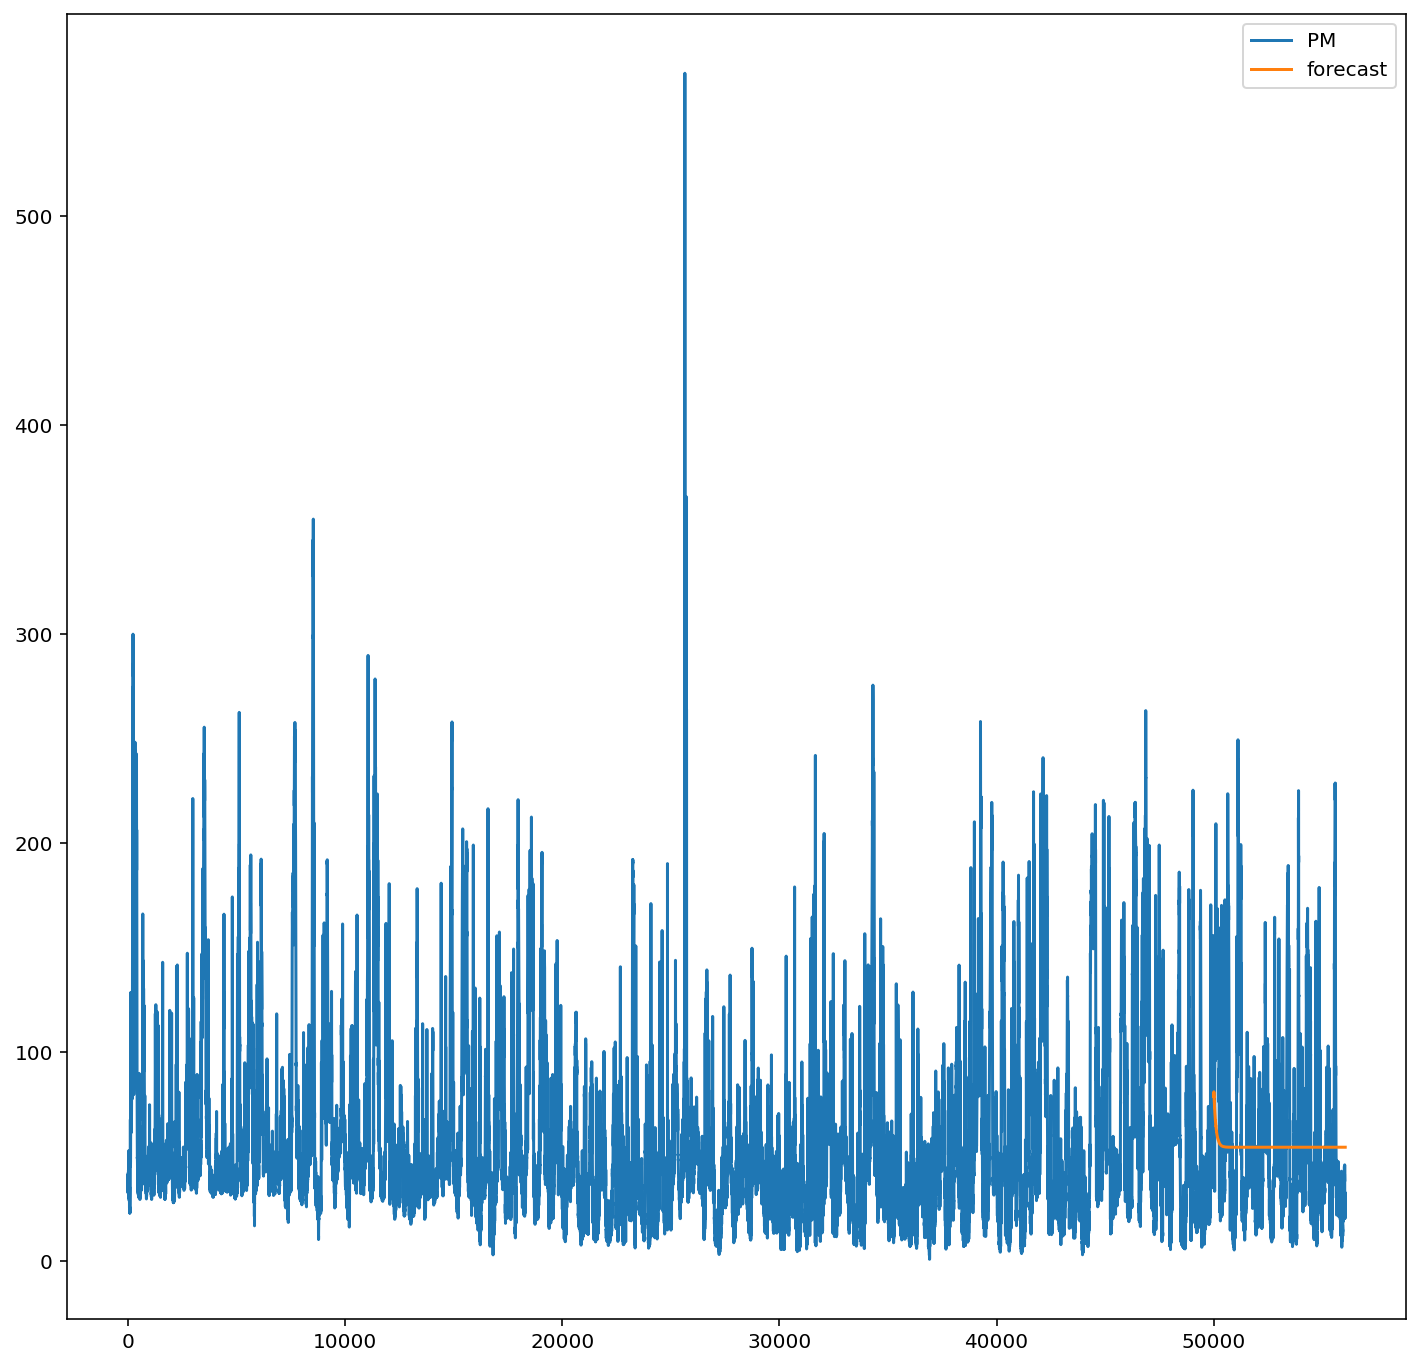

In [50]:
df1['forecast']=model_fit.predict(start=50000,end=56051,dynamic=True)
df1[['PM','forecast']].plot(figsize=(12,12))

In [28]:
import statsmodels.api as sm

In [29]:
model=sm.tsa.statespace.SARIMAX(df1['PM'],order=(2, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

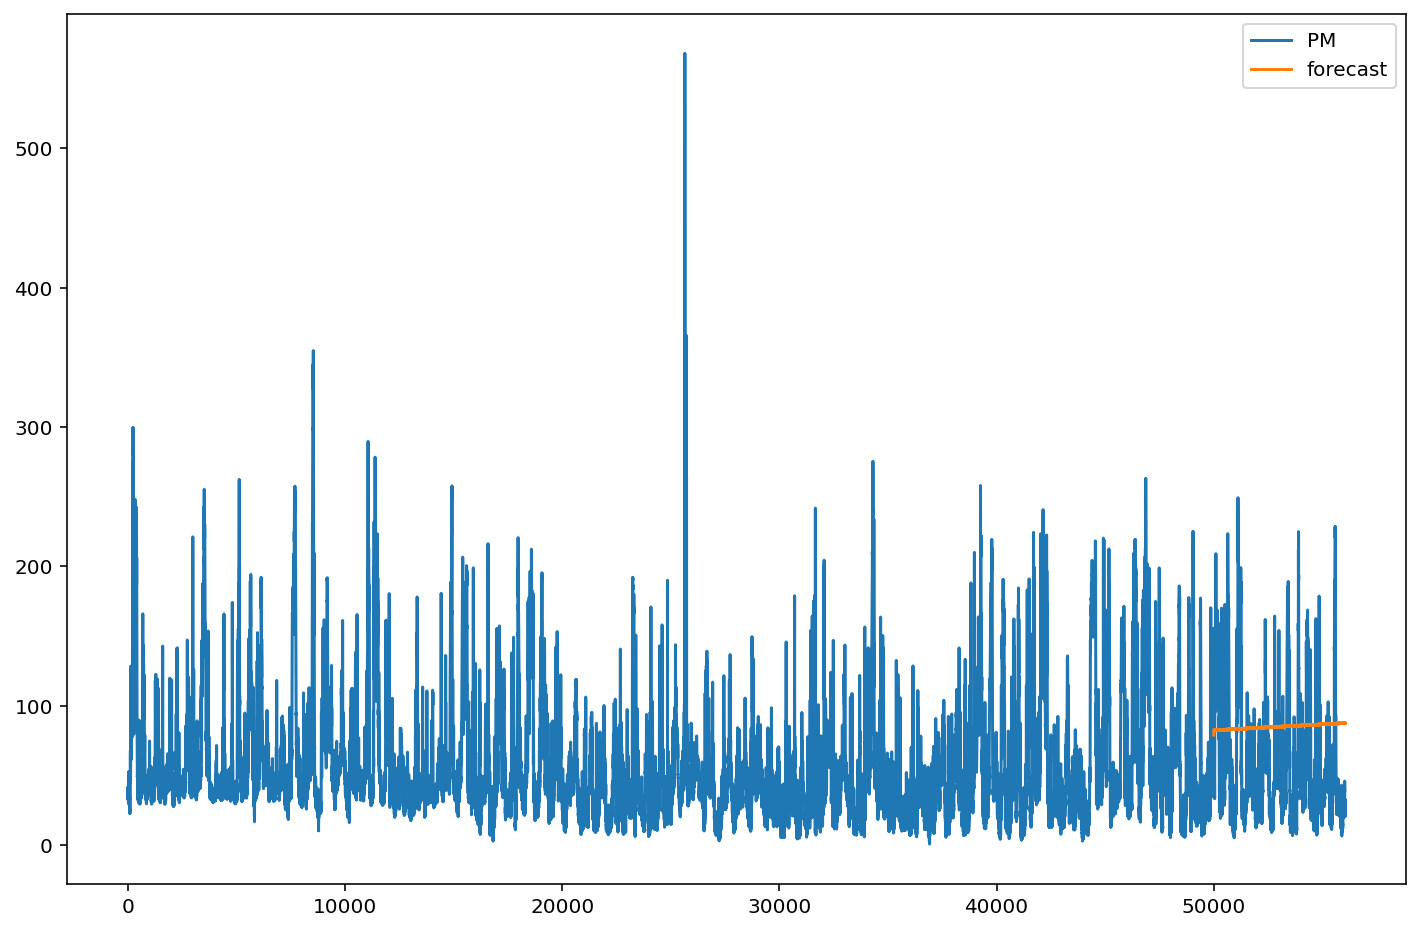

In [30]:
df1['forecast']=results.predict(start=50000,end=56050,dynamic=True)
df1[['PM','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
#future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_dates = [df1.iloc[-1]["date"] + DateOffset(months = x) for x in range (0,24)]

TypeError: ignored